# Laboratory : Image Classification using CNN

At the end of this laboratory, you would get familiarized with

*   Creating deep networks using Keras
*   Steps necessary in training a neural network
*   Prediction and performance analysis using neural networks
*   Using pre-trained networks
*   Feature visualizations

---

# **Colaboratory environment**
By default, Colab notebooks run on CPU.
You can switch your notebook to run with GPU.

In order to obtain access to the GPU, you need to choose the tab Runtime and then select “Change runtime type” as shown in the following figure:

![Changing runtime](https://miro.medium.com/max/747/1*euE7nGZ0uJQcgvkpgvkoQg.png)

When a pop-up window appears select GPU. Ensure “Hardware accelerator” is set to GPU.

# **Working with a new dataset: CIFAR-10**

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. More information about CIFAR-10 can be found [here](https://www.cs.toronto.edu/~kriz/cifar.html).

In Keras, the CIFAR-10 dataset is also preloaded in the form of four Numpy arrays. x_train and y_train contain the training set, while x_test and y_test contain the test data. The images are encoded as Numpy arrays and their corresponding labels ranging from 0 to 9.

Your task is to:

*   Visualize the images in CIFAR-10 dataset. Create a 10 x 10 plot showing 10 random samples from each class.
*   Convert the labels to one-hot encoded form.
*   Normalize the images.




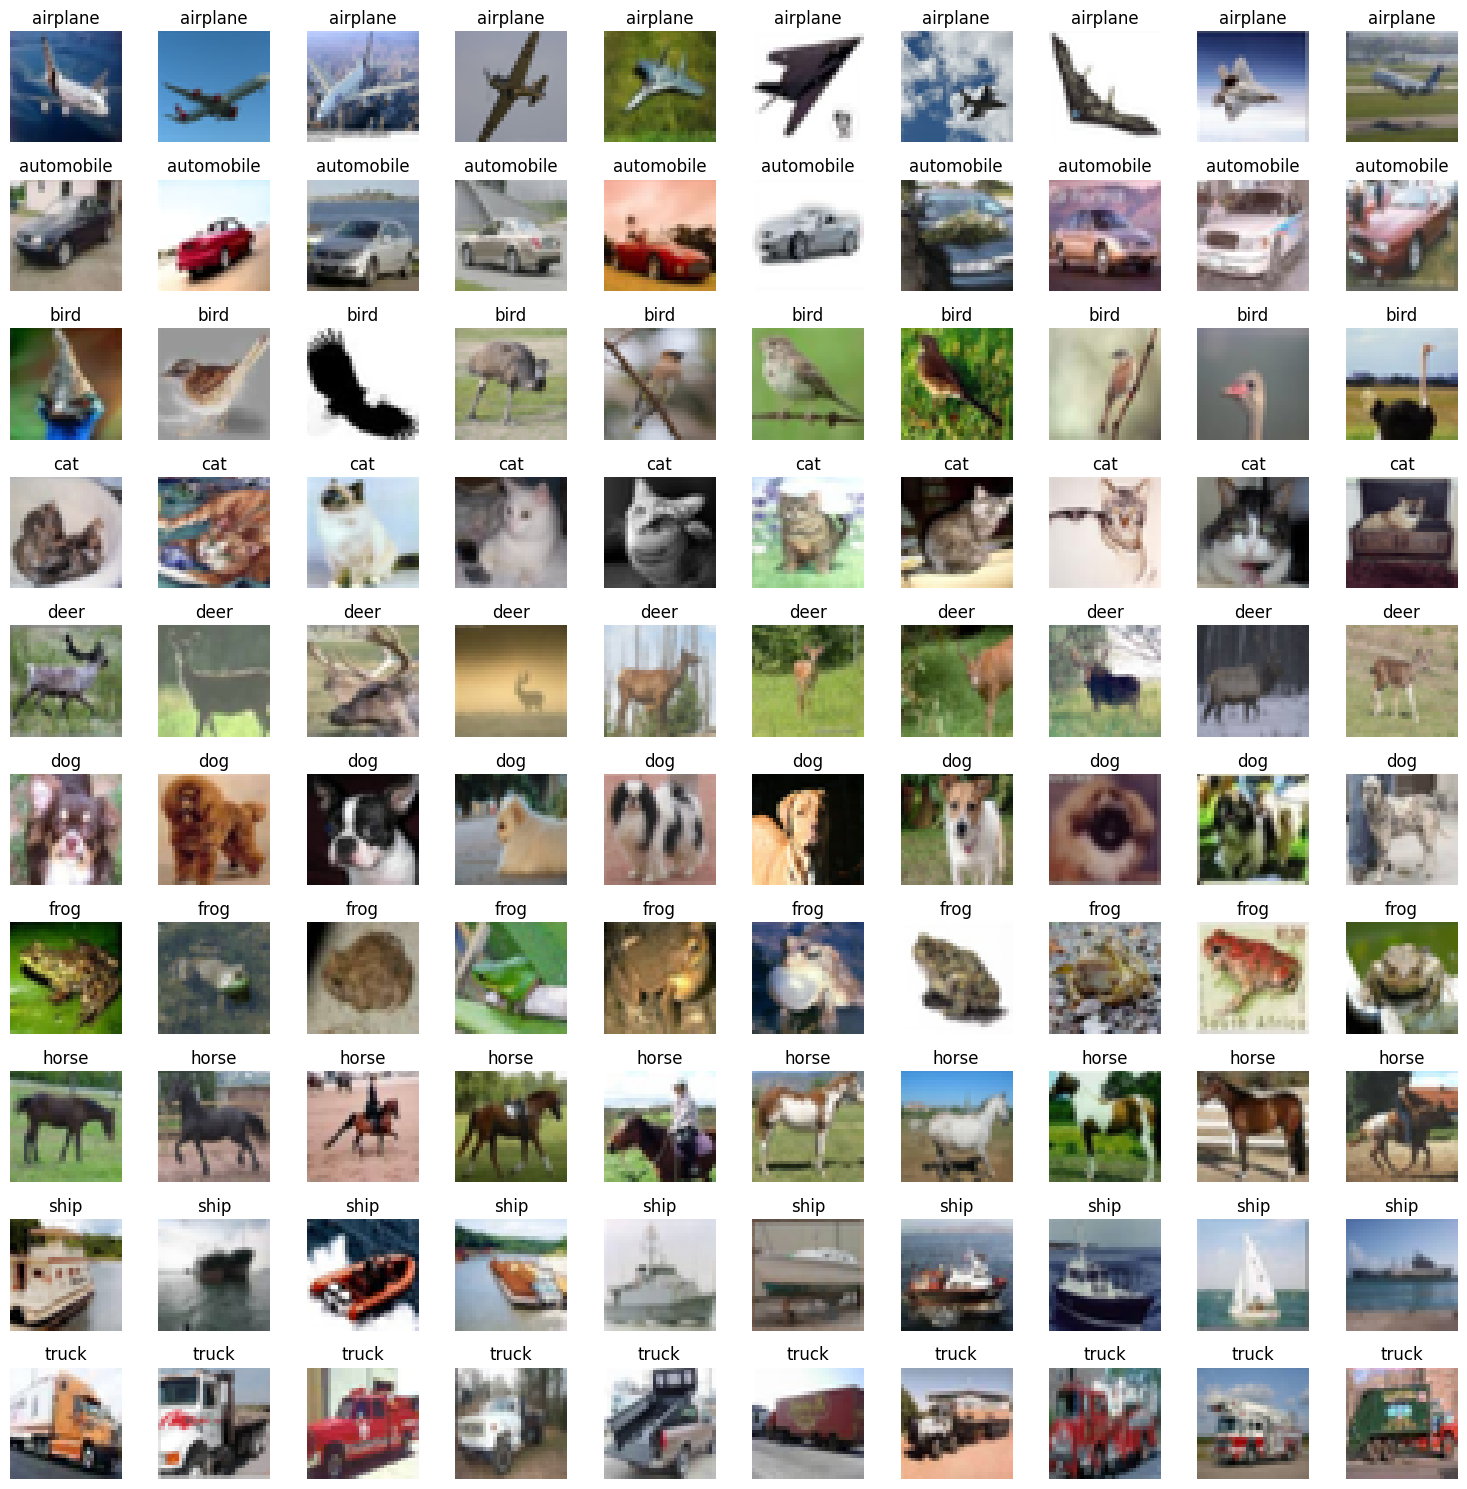

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Define the class names for CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Create a 10x10 plot showing 10 random samples from each class
plt.figure(figsize=(15, 15))
for i in range(10):
    class_indices = np.where(y_train == i)[0]
    random_indices = np.random.choice(class_indices, 10, replace=False)
    for j, idx in enumerate(random_indices):
        plt.subplot(10, 10, i * 10 + j + 1)
        plt.imshow(x_train[idx])
        plt.title(class_names[i])
        plt.axis('off')
plt.tight_layout()
plt.show()

# Convert labels to one-hot encoded form
y_train_one_hot = to_categorical(y_train, num_classes=10)
y_test_one_hot = to_categorical(y_test, num_classes=10)

In [2]:
# Normalize the images
x_train_normalized = x_train.astype('float32') / 255.0
x_test_normalized = x_test.astype('float32') / 255.0

# Verify the shapes of the arrays
print('x_train shape:', x_train_normalized.shape)
print('y_train shape:', y_train_one_hot.shape)
print('x_test shape:', x_test_normalized.shape)
print('y_test shape:', y_test_one_hot.shape)

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 10)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 10)


## Define the following model (same as the one in tutorial)

**For the convolutional front-end, start with a single convolutional layer with a small filter size (3,3) and a modest number of filters (32) followed by a max pooling layer. Use the input as (32,32,3). The filter maps can then be flattened to provide features to the classifier. Use a dense layer with 100 units before the classification layer (which is also a dense layer with softmax activation).**

In [3]:
from keras.backend import clear_session
clear_session()

In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
# Create the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(100, activation='relu'),
    Dense(10, activation='softmax')
])


c:\Users\drago\Documents\Ironhack\Week8\lydia_mlops\venv_mlops\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 512 epochs with a batch size of 32.

In [5]:
# Compile the model
model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [6]:
history = model.fit(x_train_normalized, y_train_one_hot, batch_size=512, epochs=50)

Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.1575 - loss: 2.2785
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.2464 - loss: 2.1558
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.2902 - loss: 2.0403
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.3142 - loss: 1.9712
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.3303 - loss: 1.9222
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.3463 - loss: 1.8850
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.3574 - loss: 1.8476
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.3630 - loss: 1.8311
Epoch 9/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.3695 - loss: 1.8110
Epoch 10/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.3820 - loss: 1.7746
Epoch 11/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.3900 - loss: 1.7592
Epoch 12/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy:

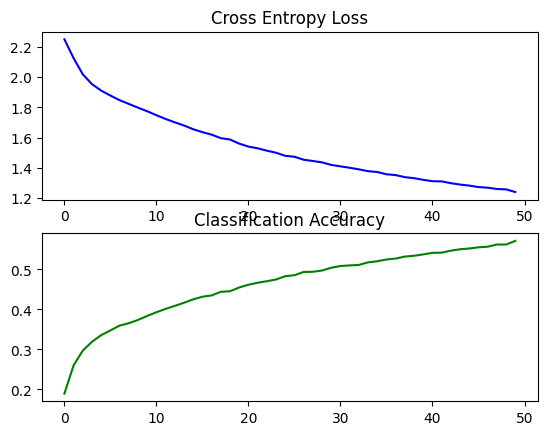

In [7]:
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')

plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='green', label='train')
plt.show()

## Defining Deeper Architectures: VGG Models

*   Define a deeper model architecture for CIFAR-10 dataset and train the new model for 512 epochs with a batch size of 32. We will use VGG model as the architecture.

**Stack two convolutional layers with 32 filters, each of 3 x 3. Use a max pooling layer and next flatten the output of the previous layer and add a dense layer with 128 units before the classification layer. For all the layers, use ReLU activation function. Use same padding for the layers to ensure that the height and width of each layer output matches the input**


In [8]:
from keras.backend import clear_session
clear_session()

In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
# Create the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 512 epochs with a batch size of 32.

In [10]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics = ['accuracy'])

In [11]:
history_deep = model.fit(x_train_normalized, y_train_one_hot, batch_size=512, epochs=50)

Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 9s 88ms/step - accuracy: 0.1138 - loss: 2.3004
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 9s 88ms/step - accuracy: 0.1980 - loss: 2.2230
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 9s 88ms/step - accuracy: 0.2572 - loss: 2.0801
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 9s 91ms/step - accuracy: 0.3018 - loss: 1.9833
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 9s 88ms/step - accuracy: 0.3243 - loss: 1.9201
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 9s 88ms/step - accuracy: 0.3433 - loss: 1.8741
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 8s 85ms/step - accuracy: 0.3637 - loss: 1.8317
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 8s 86ms/step - accuracy: 0.3701 - loss: 1.7911
Epoch 9/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 9s 88ms/step - accuracy: 0.3803 - loss: 1.7675
Epoch 10/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 9s 87ms/step - accuracy: 0.3857 - loss: 1.7379
Epoch 11/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 8s 84ms/step - accuracy: 0.4008 - loss: 1.7079
Epoch 12/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 8s 84ms/step - accuracy:

*   Compare the performance of both the models by plotting the loss and accuracy curves of both the training steps. Does the deeper model perform better? Comment on the observation.
 

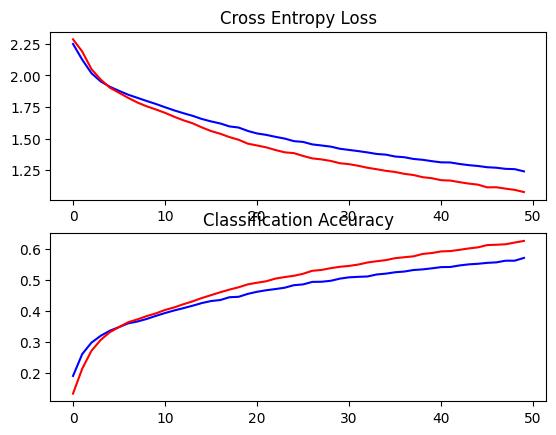

In [12]:
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='tutorial')
plt.plot(history_deep.history['loss'], color='red', label='deep')

plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='tutorial')
plt.plot(history_deep.history['accuracy'], color='red', label='deep')
plt.show()

**Solution**

*(Double-click or enter to edit)*

...

*   Use predict function to predict the output for the test split
*   Plot the confusion matrix for the new model and comment on the class confusions.


In [13]:
import numpy as np
predictions = model.predict(x_test_normalized)

print(predictions.shape)
predictions = np.argmax(predictions, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
(10000, 10)


In [14]:
from sklearn.metrics import confusion_matrix

gt = np.argmax(y_test, axis=1)
confusion_matrix(gt, predictions)

array([[1295,  780,  920,  800,  650, 1234,  870, 1281,  719, 1451],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0]],
      dtype=int64)

**Solution**

*(Double-click or enter to edit)*

...

*    Print the test accuracy for the trained model.

In [15]:
test_loss, test_acc = model.evaluate(x_test_normalized, y_test_one_hot)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5916 - loss: 1.1750
Test loss: 1.1826754808425903
Test accuracy: 0.5867000222206116


## Define the complete VGG architecture.

**Stack two convolutional layers with 64 filters, each of 3 x 3 followed by max pooling layer. Stack two more convolutional layers with 128 filters, each of 3 x 3, followed by max pooling, follwed by two more convolutional layers with 256 filters, each of 3 x 3, followed by max pooling. Flatten the output of the previous layer and add a dense layer with 128 units before the classification layer. For all the layers, use ReLU activation function. Use same padding for the layers to ensure that the height and width of each layer output matches the input**

*   Change the size of input to 64 x 64.

In [16]:
from keras.backend import clear_session
clear_session()

In [18]:
from skimage.transform import resize

x_train_resized = []
for i, _ in enumerate(x_train_normalized):
    x_train_resized.append(resize(x_train[i], (64, 64)))

x_test_resized = []
for i, _ in enumerate(x_test_normalized):
    x_test_resized.append(resize(x_test[i], (64, 64)))

x_train = np.array(x_train_resized)
x_test = np.array(x_test_resized)

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2), padding='same'),
    Conv2D(128, (3, 3), activation='relu'),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2), padding='same'),
    Conv2D(256, (3, 3), activation='relu'),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])


c:\Users\drago\Documents\Ironhack\Week8\lydia_mlops\venv_mlops\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 100 epochs with a batch size of 32.
*   Predict the output for the test split and plot the confusion matrix for the new model and comment on the class confusions.

In [20]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics = ['accuracy'])

In [21]:
history_vgg = model.fit(x_train, y_train_one_hot, batch_size=512, epochs=50)

Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 277s 3s/step - accuracy: 0.1185 - loss: 2.3018
Epoch 2/50
 3/98 ━━━━━━━━━━━━━━━━━━━━ 4:24 3s/step - accuracy: 0.1319 - loss: 2.2957

KeyboardInterrupt: 

In [ ]:
predictions = model.predict(x_test)

print(predictions.shape)
predictions = np.argmax(predictions, axis=1)

In [ ]:
gt = np.argmax(y_test, axis=1)
confusion_matrix(gt, predictions)

# Understanding deep networks

*   What is the use of activation functions in network? Why is it needed?
*   We have used softmax activation function in the exercise. There are other activation functions available too. What is the difference between sigmoid activation and softmax activation?
*   What is the difference between categorical crossentropy and binary crossentropy loss?

**Solution**

1 - Use of activation functions:

Activation Functions are crucial in neural networks because they introduce non-linearity. This means they help the network learn complex patterns rather than just simple, straight-line patterns. Without them, no matter how many layers the network has, it would behave like a single-layer model, which isn't very powerful. They also play a role in the backpropagation process, helping to adjust the network's weights during training.

_

2 - Key Differences between sigmoid and softmax:

Sigmoid is for binary classification, giving individual probabilities.

Softmax is for multi-class classification, giving a full set of probabilities that sum to 1.

_

3 - Key Differences between categorical crossentropy and binary crossentropy loss:

Binary crossentropy is for problems with two classes.

Categorical crossentropy is for problems with multiple classes.

Binary uses a single binary value as the label, while categorical uses a one-hot encoded vector.


# Transfer Learning

It is not always necessary to train models from scratch. We can use the knowledge of networks trained on other tasks to learn the task at hand. In this exercise, we will explore the use of pre-trained weights and train on the CIFAR-10 dataset.

*   Create a base imagenet pretrained InceptionV3 model.
    *    Hint: Use tf.keras.applications to create the model
    *    Pay attention to the include_top parameter.


In [22]:
from keras.backend import clear_session
clear_session()

from tensorflow.keras.applications.inception_v3 import InceptionV3

base_model = InceptionV3(weights='imagenet', include_top=False)

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 28s 0us/step


*    Add a global average pooling layer, followed by a fully-connected layer with 1024 neurons and then the classification layer.

In [23]:
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model

In [26]:
# Add a global average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)

# Add a fully-connected layer with 1024 neurons
x = Dense(1024, activation='relu')(x)

# Add the classification layer (assuming 10 classes, change the number as needed)
predictions = Dense(10, activation='softmax')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

*   Train the model by freezing the base model. Train only the newly added layers.
    *    Hint: Every layer has an attribute called 'trainable'
*   Compile the model and train the model for a few epochs only.

*    Freeze the bottom layers and unfreeze the base layers.
*    Compile and train the classifier with a very low learning rate (0.0001)

In [ ]:
# solution



*    Compare the performance of the VGG model and the Inception-V3 model.

**Solution**

*(Double-click or enter to edit)*

...

*    When do we train models from scratch? What are the potential issues in training models from scratch?

**Solution**

*(Double-click or enter to edit)*

...

*    Why do we use pre-trained weights?
*    What is the difference between using random initialization and using weights from a pre-trained model?

**Solution**

*(Double-click or enter to edit)*

...

# Extracting features from Deep Networks

It is quite possible to extract features (similar to SIFT or ORB) from different layers of deep network.

*   Load ResNet50 model with imagenet weights and check the summary of the model
*   Create a model to extract features from the 'avg_pool' layer.
*   Extract features from the layer for all the train images.
*   Use the extracted features to train a SVM classifier.
    *    Use GridSearchCV and SVC to perform the classification

In [ ]:
# solution



*    Evaluate the trained SVM model using the test set
*    Calculate the accuracy score and confusion matrix

In [ ]:
# solution



# Feature Visualizations

In order to visualize the features of a higher dimension data, t-SNE is used. t-SNE converts the affinities of the data points to probabilities. It recreates the probability distribution in a low-dimensional space. It is very helpful in visualizing features of different layers in a neural network.

You can find more information about t-SNE [here](https://scikit-learn.org/stable/modules/manifold.html#t-distributed-stochastic-neighbor-embedding-t-sne)

*    Use TSNE to visualize the features extracted in the previous exercise.
    *    Hint: TSNE function is available in the *sklearn.manifold* package.

In [ ]:
# solution



*    Why is feature visualization helpful?

**Solution**

*(Double-click or enter to edit)*

...


---

## **End of P4_1: Image Classification using CNN**